In [1]:
import sys

sys.path.append('../')
from example_preprocessing.example_preprocessing import preprocess_data, extract_expected
from example_preprocessing.char_example_processing import *

C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\pugnlp\constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\pugnlp\constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\pugnlp\tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  np = pd.np
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\pugnlp\util.py:80: FutureWarning: The pandas.np module is deprecated and wil

In [2]:
data = preprocess_data("../src/part_6/stanford_sent_analysis_dataset/aclImdb/test")
data = data[:5000]

expected = extract_expected(data)
avg_len = avg_symbol_len(data)
print('Avg symbols in data:', avg_len)

Avg symbols in data: 1314.1916


In [3]:
len(data)

5000

In [4]:
listified_data = clear_data(data)
del data

In [5]:
common_length_data = char_pad_trunc(listified_data, maxlen=1500)
del listified_data

char_indices, indices_char = create_dicts(common_length_data)
encoded_data = one_hot_encode(common_length_data, char_indices, 1500)
del common_length_data

In [18]:
split_point = int(len(encoded_data) * .8)
expected = np.array(expected)

x_train = encoded_data[:split_point]
y_train = expected[:split_point]

x_test = encoded_data[split_point:]
y_test = expected[split_point:]

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Flatten, LSTM

In [9]:
num_neurons = 40
maxlen = 1500

In [11]:
model = Sequential()
model.add(LSTM(units=num_neurons, return_sequences=True,
               input_shape=(maxlen, len(char_indices.keys()))))
model.add(Dropout(rate=.2))
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1500, 40)          14080     
                                                                 
 dropout_1 (Dropout)         (None, 1500, 40)          0         
                                                                 
 flatten_1 (Flatten)         (None, 60000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 60001     
                                                                 
Total params: 74,081
Trainable params: 74,081
Non-trainable params: 0
_________________________________________________________________


In [19]:
batch_size = 32
epochs = 10
model.fit(x_train, y_train,
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          epochs=epochs)

Epoch 1/10
125/125 [==============================] - 12s 58ms/step - loss: 0.7298 - accuracy: 0.5160 - val_loss: 0.6947 - val_accuracy: 0.5220
Epoch 2/10
125/125 [==============================] - 5s 43ms/step - loss: 0.6128 - accuracy: 0.6913 - val_loss: 0.7547 - val_accuracy: 0.5110
Epoch 3/10
125/125 [==============================] - 5s 43ms/step - loss: 0.5033 - accuracy: 0.7905 - val_loss: 0.7108 - val_accuracy: 0.5710
Epoch 4/10
125/125 [==============================] - 5s 42ms/step - loss: 0.4045 - accuracy: 0.8535 - val_loss: 0.7552 - val_accuracy: 0.5430
Epoch 5/10
125/125 [==============================] - 5s 43ms/step - loss: 0.3162 - accuracy: 0.9013 - val_loss: 0.8347 - val_accuracy: 0.5400
Epoch 6/10
125/125 [==============================] - 6s 46ms/step - loss: 0.2385 - accuracy: 0.9355 - val_loss: 0.9218 - val_accuracy: 0.5420
Epoch 7/10
125/125 [==============================] - 5s 43ms/step - loss: 0.1810 - accuracy: 0.9515 - val_loss: 1.0528 - val_accuracy: 0.521

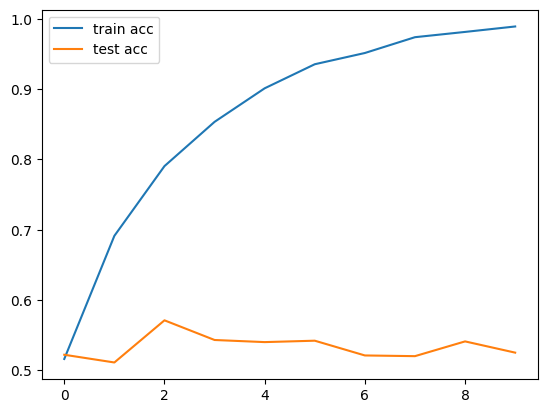

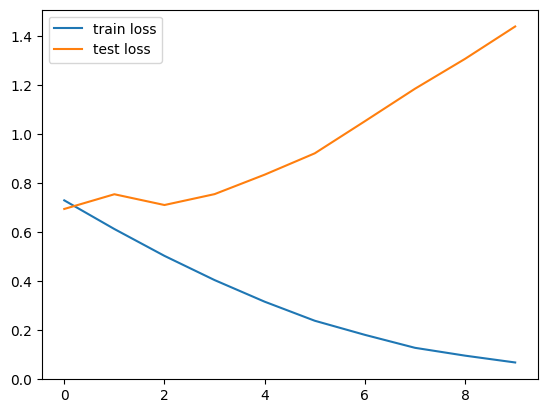

In [20]:
history = _

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()